In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Developing visualization function for model scores

In [157]:
results_df = pd.read_csv('../results/01_07_719490279/BRCA_All.tsv', index_col=0, sep='\t')

In [158]:
results_df = results_df[['y', 'y_trans', 'y_pred']]

In [159]:
test_set_mask = np.logical_not(pd.isnull(results_df['y_pred']))

In [160]:
test_set_df = results_df[test_set_mask]

In [161]:
x = np.zeros(len(test_set_df))

In [162]:
hues = test_set_df['y_pred'].apply(lambda x: 'green' if x else 'red')

In [177]:
# Credit to yoavram at https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot
def rand_jitter(arr):
    # stdev = .01*(max(arr)-min(arr))
    stdev = 0.0001
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, hold=hold, **kwargs)

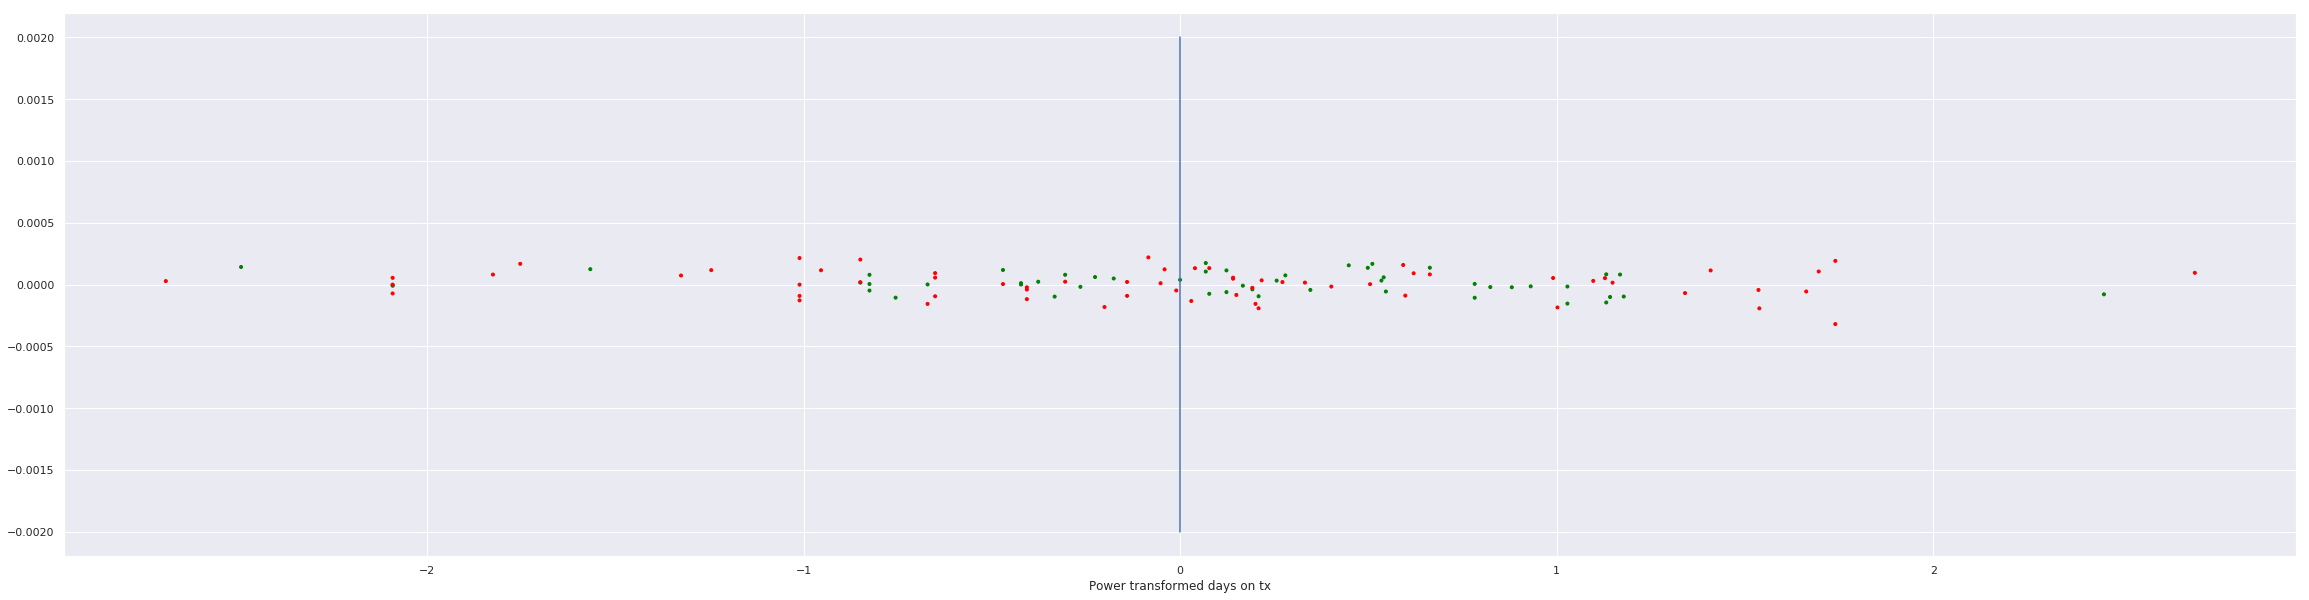

In [180]:
plt.figure(figsize=(40, 10))
plt.plot([0, 0], [-0.002, 0.002], '-')
plt.scatter(test_set_df['y_trans'], rand_jitter(x), c=hues, marker='.')
plt.xlabel('Power transformed days on tx')

plt.show()

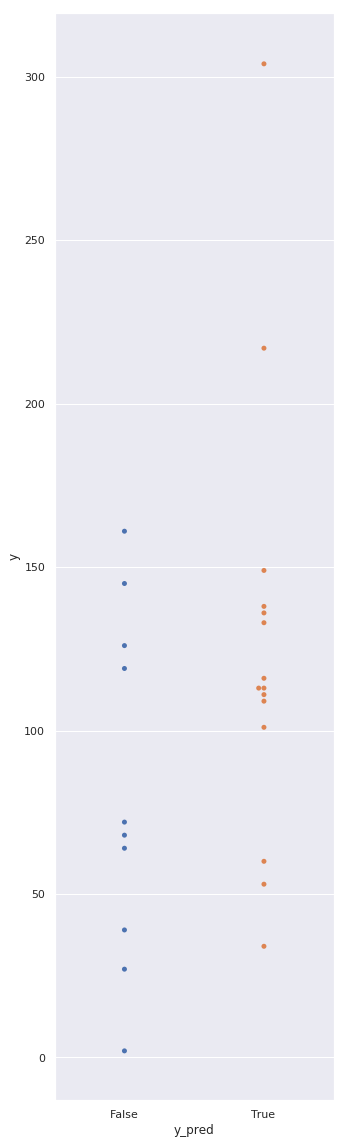

In [143]:
plt.figure(figsize=(5,20))
ax = sns.swarmplot(x='y_pred', y='y', data=test_set_df)

In [128]:
test_set_df.shape

(82, 3)